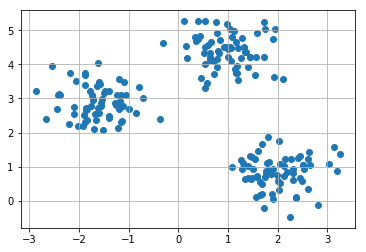

In [2]:
# =============================================================================
# K-means clustering
# =============================================================================
# Generating simulated data
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.5,
                  shuffle=True, random_state=0)

import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], marker='o')
plt.grid()
plt.show()

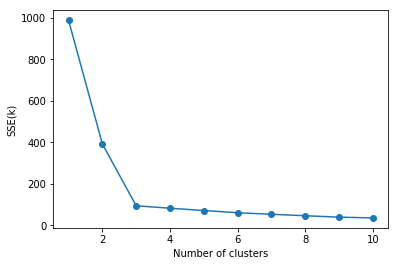

In [3]:
# K-means clustering
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, init='random', n_init=10, 
            max_iter=300, tol=1e-04, random_state=0)  # init='random': K-means를 의미
y_km = km.fit_predict(X)

# Elbow method
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, n_init=10,
                max_iter=300, random_state=0)  # n_init=10: K-means++ with K=10을 의미
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE(k)')
plt.show()

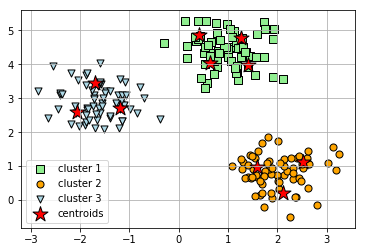

In [4]:
# Plotting results
plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=50, c='lightgreen',
            marker='s', edgecolor='black', label='cluster 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=50, c='orange',
            marker='o', edgecolor='black', label='cluster 2')
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s=50, c='lightblue',
            marker='v', edgecolor='black', label='cluster 3')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, c='red',
            marker='*', edgecolor='black', label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [5]:
# =============================================================================
# Hierachical clustering (Agglomerate)
# =============================================================================
# Generating simulated data
import pandas as pd
import numpy as np
np.random.seed(123)
features = ['X', 'Y', 'Z']
id = ['ID0','ID1','ID2','ID3','ID4']
X = np.random.random_sample([5,3])*10
df = pd.DataFrame(X, columns=features, index=id)
print(df)

            X         Y         Z
ID0  6.964692  2.861393  2.268515
ID1  5.513148  7.194690  4.231065
ID2  9.807642  6.848297  4.809319
ID3  3.921175  3.431780  7.290497
ID4  4.385722  0.596779  3.980443


In [6]:
# Agglomerative clustering with K=3
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete') #이거 옵션 바꾸기 :linkage= single, average
labels = agg.fit_predict(X)
print('Cluster labels: %s' % labels)

Cluster labels: [1 0 0 2 1]


In [7]:
# Agglomerative clustering with K=2
agg = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
labels = agg.fit_predict(X)
print('Cluster labels: %s' % labels) #위에서 밑으로 이렇게 편입된게 맞느냐? 판단해야함

Cluster labels: [0 1 1 0 0]


In [1]:
# =============================================================================
# K-means  vs.  Hierachical (Agglomerate)  vs.  DBSCAN
# =============================================================================
# Generating simulated data
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

In [2]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1])
plt.show()

<Figure size 640x480 with 1 Axes>

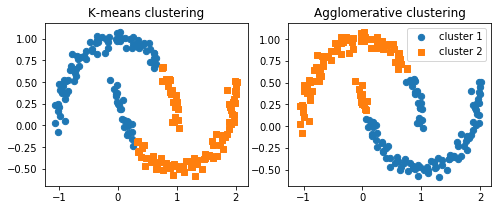

In [3]:
# K-means and Hierachical(Agglomerative) clustering
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, random_state=0)  # K-means clustering
y_km = km.fit_predict(X)
ax1.scatter(X[y_km==0,0], X[y_km==0,1], marker='o', s=40,label='cluster 1')
ax1.scatter(X[y_km==1,0], X[y_km==1,1], marker='s', s=40,label='cluster 2')
ax1.set_title('K-means clustering')

from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=2, linkage='complete')  # Agglomerative clustering
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac==0,0],X[y_ac==0,1], marker='o', s=40, label='cluster 1')
ax2.scatter(X[y_ac==1,0],X[y_ac==1,1], marker='s', s=40, label='cluster 2')
ax2.set_title('Agglomerative clustering')
plt.legend()
plt.show()

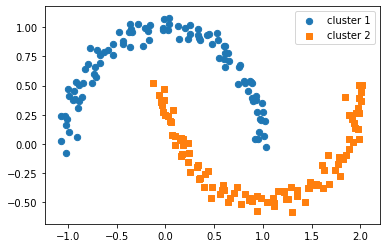

In [4]:
# DBSCAN
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)

plt.scatter(X[y_db==0,0], X[y_db==0,1], marker='o', s=40, label='cluster 1')
plt.scatter(X[y_db==1,0], X[y_db==1,1], marker='s', s=40, label='cluster 2')
plt.legend()
plt.show()

C:\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


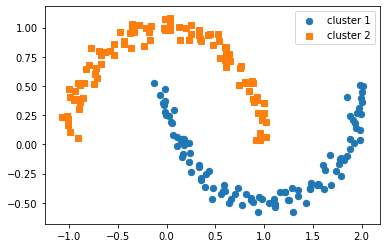

In [5]:
import hdbscan
hdb=hdbscan.HDBSCAN(min_samples=10)
y_hdb = hdb.fit_predict(X)

plt.scatter(X[y_hdb==0,0], X[y_hdb==0,1], marker='o', s=40, label='cluster 1')
plt.scatter(X[y_hdb==1,0], X[y_hdb==1,1], marker='s', s=40, label='cluster 2')


plt.legend()
plt.show()

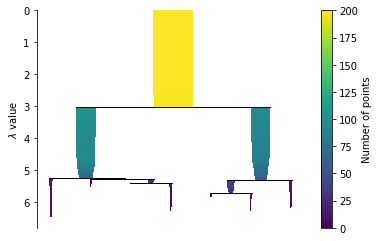

In [7]:
hdb.condensed_tree_.plot()

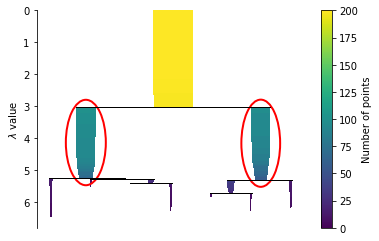

In [9]:
hdb.condensed_tree_.plot(select_clusters=True)

In [13]:
# =============================================================================
# K-means clustering: 손글씨
# =============================================================================
# Importing data
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape  # (관측치 개수, 특성변수 개수)

(1797, 64)

In [14]:
# K-means clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0)  # n_cluster = 군집의 개수
clusters = kmeans.fit_predict(digits.data)
aa = kmeans.cluster_centers_.shape  # kmeans.cluster_centers_: 각 군집의 중심값

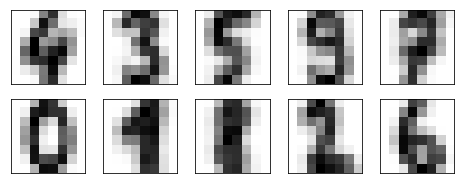

In [15]:
# 각 군집의 중심값의 이미지 (순서 X)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [16]:
# Accuracy score
import numpy as np
from scipy.stats import mode
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters==i)
    labels[mask] = mode(digits.target[mask])[0]  # 군집 결과에 라벨 부여

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7935447968836951

In [18]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(digits.target, labels)
print(mat)

[[177   0   0   0   1   0   0   0   0   0]
 [  0  55  24   1   0   1   2   0  99   0]
 [  1   2 148  13   0   0   0   3   8   2]
 [  0   0   0 154   0   2   0   7   7  13]
 [  0   7   0   0 163   0   0   7   4   0]
 [  0   0   0   0   2 136   1   0   0  43]
 [  1   1   0   0   0   0 177   0   2   0]
 [  0   0   0   0   0   0   0 177   2   0]
 [  0   5   3   2   0   4   2   5 100  53]
 [  0  20   0   6   0   6   0   7   2 139]]
